### Proyek Data Mining
#### Kelompok 02

<table align="left" border="1">
    <tr>
        <th style="text-align: center;">NIM</th>
        <th style="text-align: center;">Nama</th>
    </tr>
    <tr>
        <td style="text-align: left;">12S21004</td>
        <td style="text-align: left;">Estomihi Pangaribuan</td>
    </tr>
    <tr>
        <td style="text-align: left;">12S21007</td>
        <td style="text-align: left;">Dame Sitinjak</td>
    </tr>
    <tr>
        <td style="text-align: left;">12S21008</td>
        <td style="text-align: left;">Tuani Putra Manurung</td>
    </tr>
</table>

## Tahap 1: Business Understanding

### 1.Menentukan Objektif Bisnis

Tujuan utama dari proyek ini adalah untuk memprediksi harga penjualan rumah (SalePrice) secara akurat.

Dengan model prediksi harga rumah yang akurat, diharapkan dapat membantu berbagai pihak yang terlibat dalam industri perumahan, seperti:

- Pembeli rumah: Untuk memperoleh estimasi harga yang wajar untuk properti yang diinginkan.
- Penjual rumah: Untuk menentukan harga jual yang kompetitif dan realistis.
- Agen properti dan pengembang: Untuk mendukung pengambilan keputusan dalam strategi pemasaran dan memahami tren pasar.


### 2. Menetapkan Tujuan Teknis:

Tujuan teknis dari proyek ini adalah mengembangkan model prediktif untuk estimasi harga rumah (SalePrice) menggunakan algoritma Light Gradient Boosting Machine (LightGBM). Algoritma ini dipilih karena memiliki keunggulan dalam menangani dataset yang kompleks dengan fitur numerik dan kategorikal, serta kemampuannya untuk menangkap hubungan non-linear antar variabel. Dataset yang digunakan mencakup berbagai atribut properti, seperti luas tanah, jumlah kamar, usia bangunan, dan karakteristik lingkungan sekitar. Model akan dilatih untuk menghasilkan prediksi harga rumah yang akurat dengan menggunakan MAE (Mean Absolute Error) sebagai metrik evaluasi utama untuk memastikan hasil prediksi memiliki tingkat kesalahan yang minimal. Dengan memberikan estimasi harga yang tepat dan berbasis data, model ini dirancang untuk mendukung pengambilan keputusan yang lebih baik dalam transaksi jual-beli properti. 

### 3. Membuat Rencana Proyek

Pengerjaan proyek dilakukan selama 4 minggu. Berikut tahapan pengerjaan proyek:
Untuk memastikan setiap tahap dalam proyek ini terlaksana dengan baik, dirancang rencana proyek yang terstruktur dan sistematis. Rencana ini mencakup serangkaian aktivitas mulai dari pemahaman kebutuhan bisnis hingga implementasi model ke dalam sistem yang dapat digunakan secara praktis. Tabel berikut merinci tahapan proyek, aktivitas utama, serta jadwal pelaksanaannya selama lima minggu:



#### Timeline proyek

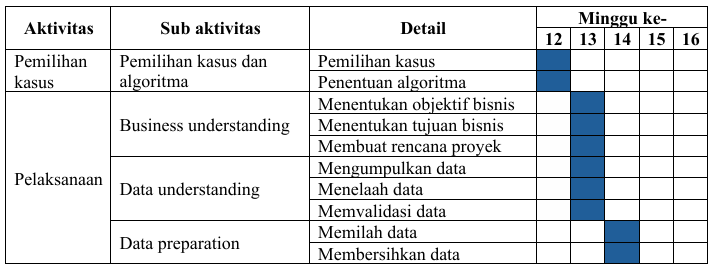 

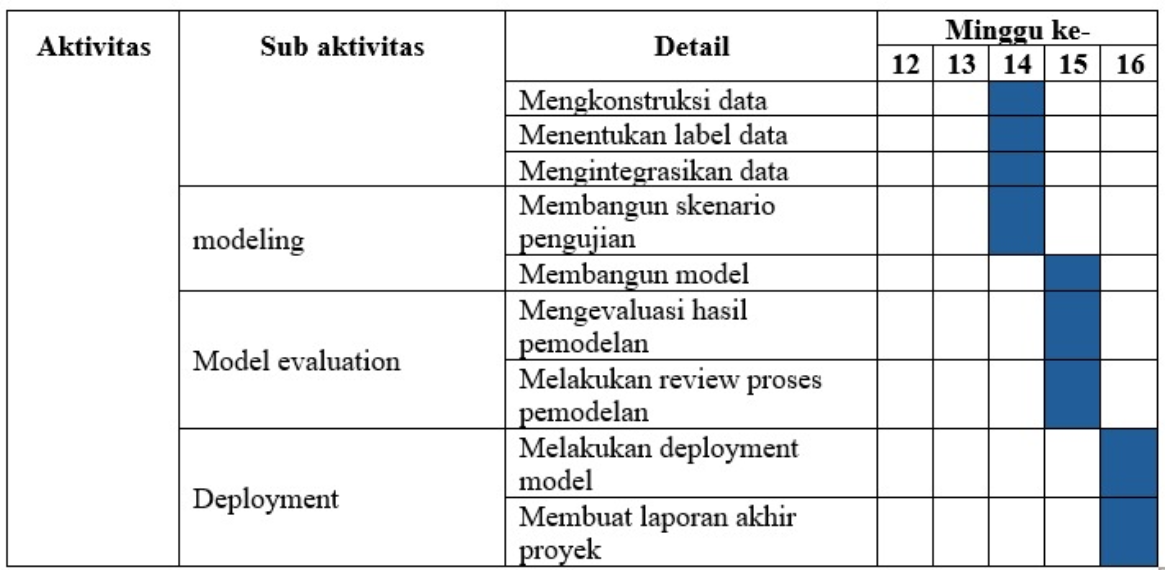  

## Data Understanding

### Mengumpulkan data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)





In [2]:
## Import data set
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
#menampilkan 10 data teratas
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Terdapat 81 kolom/atribut yang ada pada data set

In [4]:
# menampilkan data di test
df_test.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


Langkah pertama dalam tahap data understanding adalah mengumpulkan data yang akan 
digunakan untuk kasus House Price Prediction. Sumber data berasal dari kompetisi Kaggle dengan 
judul House Prices - Advanced Regression Techniques. Dataset ini disediakan dalam format file 
CSV (Comma Separated Values), yang memudahkan pengolahan data menggunakan berbagai 
tools analisis. Dataset bersifat statis, sehingga analisis dapat difokuskan pada pemahaman, 
pembersihan, dan persiapan data. Dataset ini berisi 81 atribut dan 1460 rows. Tabel berikut 
menyajikan deskripsi lebih rinci mengenai atribut-atribut pada dataset: 

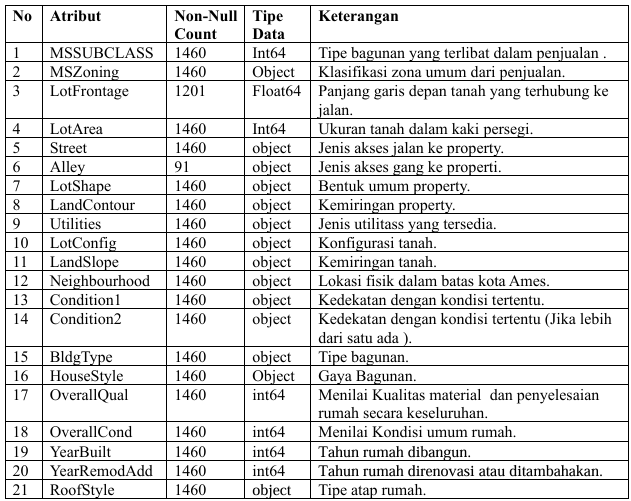

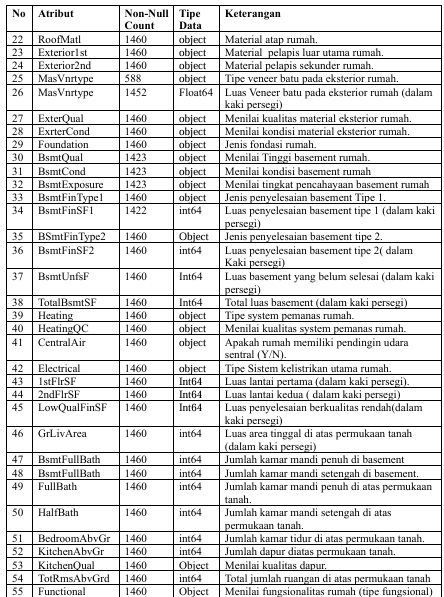

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Output menghasilkan statistik dari data set yang bisa memberikan kita informasi mengenai 
data. 
Beberapa Informasi yang bisa kita dapatkan dari hasil keluaran diatas adalah 
- Kolom LotFrontage hanya memiliki 1201 data dari total 1460, artinya ada nilai 
missing. 
- Rata-rata LotArea (luas tanah) adalah 10.516,83 kaki persegi. 
- SalePrice memiliki penyimpangan standar 79.442,50, yang menunjukkan harga rumah 
sangat bervariasi. 
- Harga rumah (SalePrice) terendah adalah $34.900 dan tertinggi $755.000. 
- Kuartil (25%, 50%, 75%) : 

25% data berada di bawah kuartil pertama (contohnya, 25% rumah memiliki 
harga di bawah $129.975). 

50% data (median) berada di tengah (contohnya, 50% rumah memiliki harga di 
bawah $163.000). 

75% data berada di bawah kuartil ketiga (contohnya, 75% rumah memiliki 
harga di bawah $214.000).

In [6]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Dari data diatas, kita dapat mengetahui:  
- Jumlah Observasi (count): jumlah nilai kosong dalam setiap kolomnya. Misalnya, 
LotFrontage hanya memiliki 1232 entri, menunjukkan ada data yang hilang karena total 
baris adalah 1459. 
- Rata-rata (mean): Rata-rata nilai dalam kolom 
- Standar Deviasi (std): Mengukur seberapa tersebar data di sekitar rata-rata, LotArea 
memiliki standar deviasi 4955.52, menunjukkan variasi ukuran lot cukup besar. 
- Minimum (Min): Nilai terkecil dalam kolom 
- Persentil (25%, 50%, 75%), menunjukkan distribusi data. Seperti yang dapat kita lihat 
dalam output diatas OverallQual pada persentil ke-50 (median) adalah 6, berarti 
setengah dari rumah memiliki kualitas 6 atau lebih. 
- Maksimum (max): Nilai terbesar dalam kolom

In [7]:
# baris dan kolom
df.shape

(1460, 81)

Dari hasil keluaran diatas, kita bisa dapat informasi bahwa data set memiliki  1460 baris dan 81 kolom

In [8]:
df_test.shape

(1459, 80)

Dari hasil keluaran diatas, kita bisa dapat informasi bahwa data set memiliki  1459 baris dan 80 kolom

In [9]:
# menampilkan informasi data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# cek info pada data test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Dari output diatas, dapat kita ketahui beberapa kolom seperti LotFrontage, Alley, 
MasVnrType, dan FireplaceQu memiliki jumlah nilai non-null yang jauh lebih sedikit 
dibandingkan jumlah total data (1460 baris). Dataset train memiliki kolom tambahan 
SalePrice, yang merupakan target atau variabel dependen dalam analisis. Kolom ini tidak 
terdapat dalam dataset test, yang hanya berisi data untuk prediksi. 

## Data Preparation

In [11]:
# Missing values
missing_train = df.isnull().sum()
print(f"Missing values in train data:\n{missing_train[missing_train > 0]}")

Missing values in train data:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Dari hasil keluaran diatas, kita mendapat informasi:
- Beberapa kolom memiliki nilai missing yang sangat banyak, seperti PoolQC (1453 data hilang), MiscFeature (1406 hilang), dan Alley (1369 hilang). Ini menunjukkan bahwa banyak data pada kolom ini tidak tersedia atau tidak tercatat.
- Kolom seperti MasVnrType (872 hilang) dan FireplaceQu (690 hilang) juga memiliki nilai hilang dalam jumlah besar.
- Kolom seperti GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond                                     
- Kolom seperti MasVnrArea (8 hilang) dan Electrical (1 hilang)

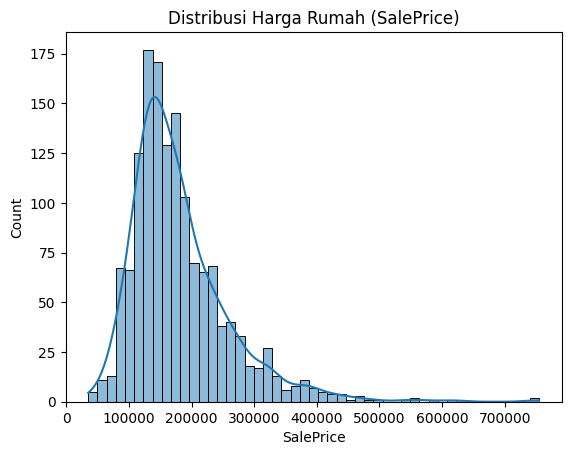

In [12]:
# Distribusi target
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribusi Harga Rumah (SalePrice)')
plt.xlabel('SalePrice')
plt.show()


Dari hasil keluaran diatas, kita mendapat beberapa informasi seperti:
- Terlihat bahwa distribusi ini miring ke kiri (left-skewed), di mana sebagian besar harga rumah berkisar di bawah 300.000, dengan puncaknya sekitar 180.000 hingga 200.000.
- Pada rentang harga 100.000 hingga 200.000, terlihat ada lebih dari 175 unit rumah, yang menunjukkan bahwa harga di kisaran ini adalah yang paling umum.
- Jumlah rumah dengan harga di atas 500.000 sangat sedikit, menunjukkan bahwa harga rumah di dalam dataset ini cenderung terfokus pada kisaran menengah hingga tinggi.
- Sebagian besar harga berada di antara 100.000 dan 300.000, dengan sedikit sekali rumah berharga di bawah 100.000 atau di atas 500.000.


In [13]:
# Kita pilih hanya kolom numerik
numeric_data = df.select_dtypes(include=['int64', 'float64'])

In [14]:
# Correlation Heatmap
corr = numeric_data.corr()
# mencari korelasi dengan target variable (SalePrice)
corr_saleprice = corr['SalePrice'].sort_values(ascending=False)
print(f"Korelasi dengan SalePrice:\n{corr_saleprice}")


Korelasi dengan SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvG

Koefisien korelasi berkisar antara -1 hingga +1.

Jika mendekati +1, ini menandakan bahwa terdapat korelasi positif yang kuat.Jadi, kita dapat melihat bahwa terdapat korelasi positif yang kuat antara SalesPrice dengan OverallQual, GrLivArea dan yang lainya.

Jika mendekati -1, berarti terdapat korelasi negatif yang kuat. Jika mendekati 0, berarti tidak terdapat korelasi.. Kita dapa melihat bahwa terdapat korelasi negatif antara SalesPrice dengan BsmtFinSF2,  BsmtHalfBath dan yang lainya.

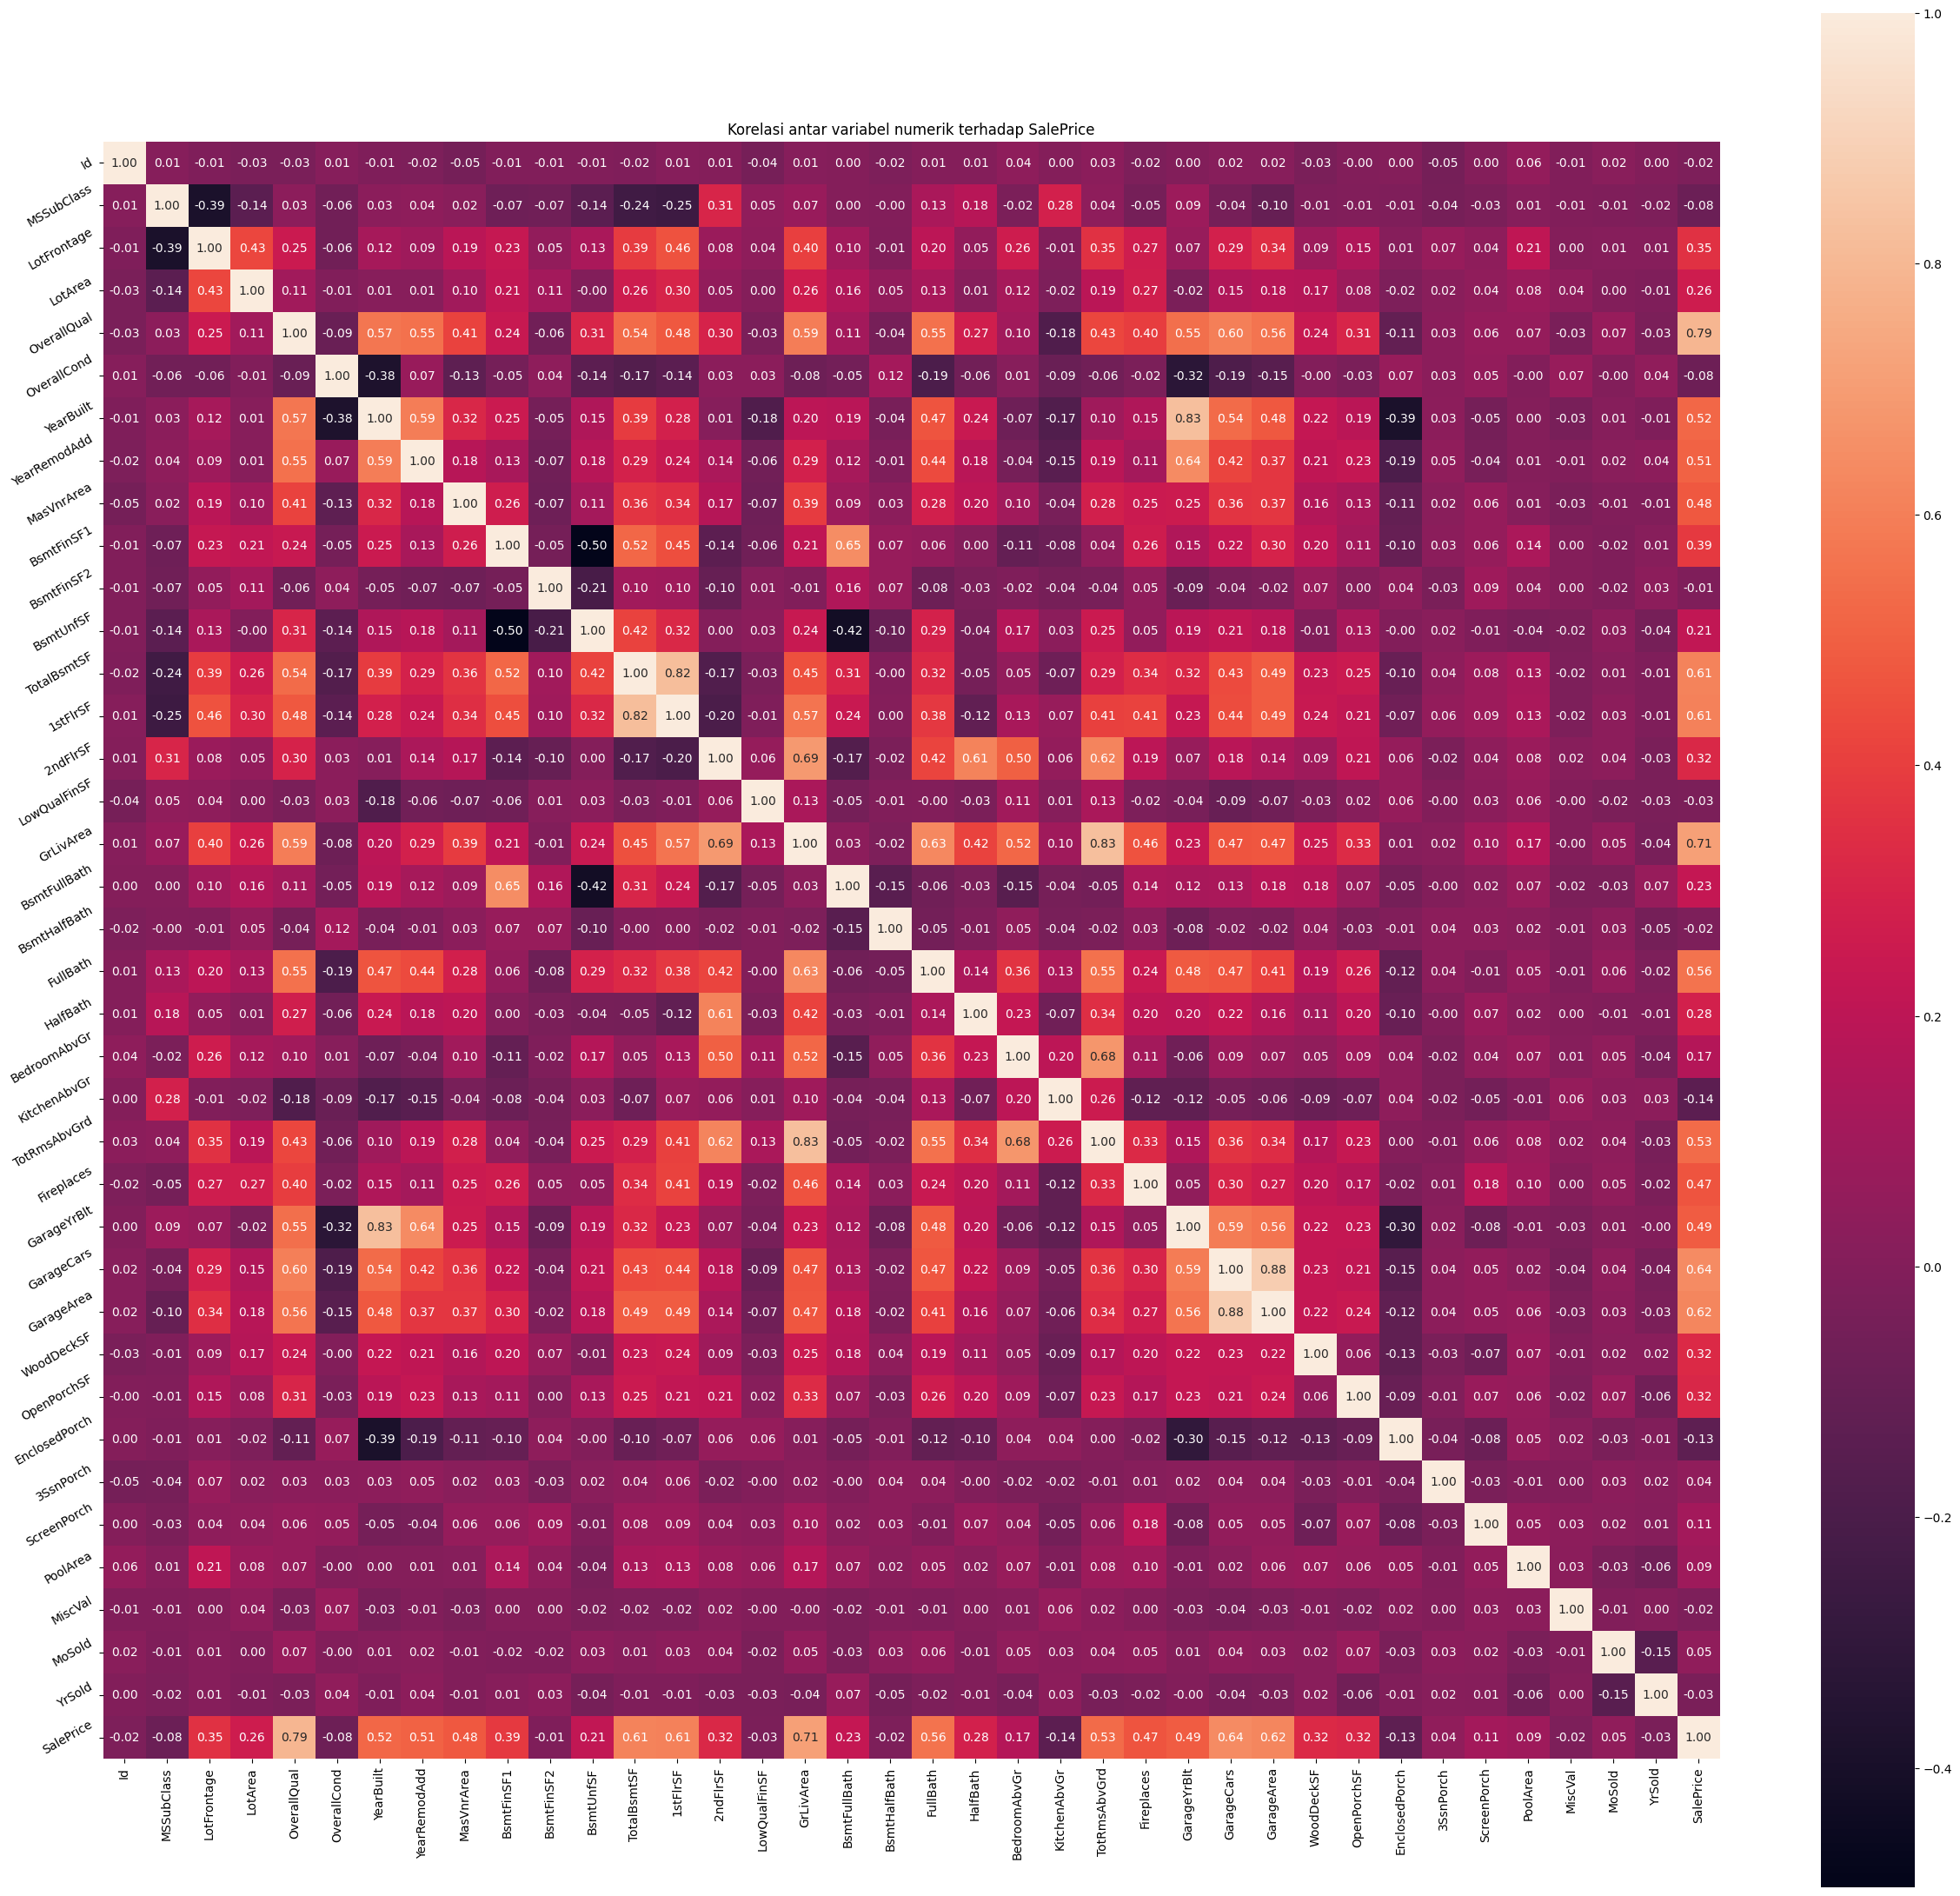

In [15]:
plt.figure(figsize=(30,28))
plt.title('Korelasi antar variabel numerik terhadap SalePrice')
a=sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()


Dari hasil keluaran code di cell sebelumnya dan hasil output diatas, beberapa informasi yang didapat adalah: 
- Jika korelasi mendekati +1, ini menandakan bahwa terdapat korelasi positif yang 
kuat. Jadi, kita dapat melihat bahwa terdapat korelasi positif yang kuat antara 
SalesPrice dengan OverallQual, GrLivArea, GarageCars, GarageArea, dan 
TotalBsmtSF. Oleh karena itu, nantinya kami akan menggunkan fitur yang 
berkorelasi positif yang memiliki nilai korelasi lebih besar dari 0.5 dengan label 
target, yaitu SalePrice. Karena korelasi ini menunjukkan bahwa peningkatan nilai 
pada fitur ini cenderung meningkatkan harga rumah. Dari korelasi diatas dapat kita 
lihat bahwa kualitas keseluruhan rumah, luas ruang tinggal, kapasitas garasi, dan 
total luas basement merupakan faktor utama yang memengaruhi harga rumah. 
- Jika mendekati -1, berarti terdapat korelasi negatif yang kuat. Jika mendekati 0, 
berarti tidak terdapat korelasi. Kita dapat melihat bahwa terdapat korelasi negatif 
antara SalesPrice dengan BsmtFinSF2, BsmtHalfBath, YtSold, MiscVal, 
EnclosedPorch dan kolom yang lain. 
- Kolom SalesPrice berkorelasi positif dengan kolom seperti LotFrontage, LotArea 
dan berbagai kolom yang lain.  

In [16]:
# Filter variabel dengan korelasi > 0.5
selected_features = corr_saleprice[corr_saleprice.abs() > 0.5].index.tolist()
selected_features.remove('SalePrice')  
print("Fitur yang dipilih berdasarkan korelasi:")
print(selected_features)

Fitur yang dipilih berdasarkan korelasi:
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


Pada tahapan diatas, data di filter untuk memilih hanya fitur yang memiliki korelasi yang 
signifikan dengan target (SalePrice). Fitur yang memiliki korelasi lebih besar dari 0.5 
dengan SalePrice dipilih sebagai best future untuk digunakan dalam model. Korelasi positif menunjukkan 
bahwa peningkatan nilai pada fitur ini cenderung meningkatkan harga rumah. Data 
pelatihan kemudian disaring agar hanya menyertakan fitur-fitur terpilih bersama dengan 
target. Berikut tabel hubungan antara fitur yang dipilih dan label yang akan diprediksi, 
yaitu salesPrice: 

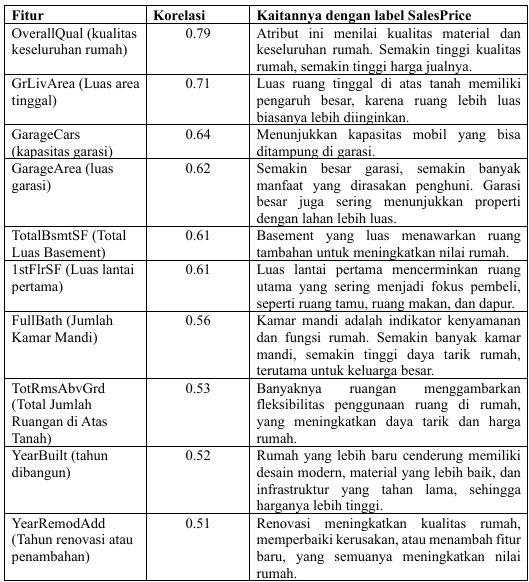


In [17]:
# Filter data train agar hanya menggunakan fitur terpilih dan target (SalePrice)
df_train_selected = df[selected_features + ['SalePrice']]

In [18]:
# Periksa nilai yang hilang (missing values)
train_missing_value = df_train_selected.isna().sum()
train_missing_value.to_csv('train_missing_value.csv')  # Simpan informasi missing value ke file
print(train_missing_value[train_missing_value > 0])
if train_missing_value[train_missing_value > 0].empty:
    print("No missing values found in the selected features.")

Series([], dtype: int64)
No missing values found in the selected features.


In [19]:
# Filter data test
df_test_selected = df_test[selected_features]

In [20]:
# Periksa nilai yang hilang (missing values)
test_missing_value = df_test_selected.isna().sum()
test_missing_value.to_csv(
    "test_missing_value.csv"
)  # Simpan informasi missing value ke file
print(test_missing_value[test_missing_value > 0])
if test_missing_value[test_missing_value > 0].empty:
    print("No missing values found in the selected features.")

GarageCars     1
GarageArea     1
TotalBsmtSF    1
dtype: int64


Dari kode diatas dapat dilihat bahwa ada fitur yang memiliki missing values. Sehingga 
perlu dilakukan tahapan untuk mengatasi masalah missing value tersebut.

Missing values diatasi dengan melakukan imputasi menggunakan parameter dari data latih, 
dengan kode berikut:

In [21]:
# Imputasi nilai yang hilang pada data test
imputer_median = SimpleImputer(strategy="median")
imputer_most = SimpleImputer(strategy="most_frequent")
numerical_cols = df_test_selected.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df_test_selected.select_dtypes(include=["object"]).columns

# # Imputasi nilai yang hilang pada data test
df_test_selected[numerical_cols] = imputer_median.fit_transform(df_test_selected[numerical_cols])


In [22]:
# Debugging: Periksa kembali apakah masih ada missing values
print("Missing Values After Imputation:")
print(df_train_selected.isna().sum())

Missing Values After Imputation:
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64


Label data adalah target atau variabel dependen yang akan diprediksi oleh model. Dalam kasus ini, 
variabel SalePrice adalah label data. Proses ini mencakup memastikan bahwa label data sudah 
benar dan sesuai dengan tujuan analisis. Dataset yang digunakan dalam pengerjaan proyek ini 
sudah menggunakan label data yang bisa digunakan langsung kedalam pelabelan data. Tahapan ini 
dilakukan pada kode berikut

In [23]:
# Memisahkan dataset menjadi fitur (input) dan target (output)
x = df_train_selected.iloc[:, :-1]
y = df_train_selected.iloc[:, -1]

In [24]:
# Scaling fitur dan target
scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(x)

scaler_y = MinMaxScaler()
y_df = y.to_frame()
y_scaled = scaler_y.fit_transform(y_df)

Pada kode diatas dilakukan pemisahan dataset menjadi dua variabel, yaitu: x (fitur) dan y (target). 
Lalu, digunakan metode MinMaxScaler untuk mentransformasi rentang nilai menjadi skala 0-1, 
yang memiliki beberapa keuntungan signifikan. Normalisasi ini membantu menyelaraskan 
kontribusi setiap fitur, mencegah dominasi variabel dengan rentang nilai besar. Proses scaling 
dilakukan secara hati-hati untuk memastikan tidak ada informasi penting yang hilang selama 
transformasi. Lalu, dilakukan pembuatan dataframe untuk target (y). 

In [25]:
# Simpan scaler
joblib.dump(scaler_x, 'models/scaler_x.pkl')
joblib.dump(scaler_y, 'models/scaler_y.pkl')

['models/scaler_y.pkl']

Kode tersebut digunakan untuk menyimpan objek scaler_x dan scaler_y yang telah di-fit pada data pelatihan ke dalam file .pkl (pickle). File ini kemudian dapat di-load kembali pada saat tahap deployment tanpa perlu mengulang proses fitting pada data pelatihan. Hal ini membantu dalam menjaga konsistensi data dan memudahkan proses prediksi pada data baru.

In [26]:
# Split data menjadi data train dan data validasi
x_train, x_valid, y_train, y_valid = train_test_split(x_scaled, y_scaled, test_size=0.2, shuffle=True, random_state=42)


Pada kode train_test_split, proporsi pembagian data adalah 80% untuk data pelatihan (train) dan 20% untuk data validasi. Ini ditentukan oleh parameter test_size=0.2, yang berarti 20% dari total data akan digunakan untuk validasi, sementara sisanya, yaitu 80%, akan digunakan untuk melatih model.

Kami hanya membagi data menjadi train dan evaluasi karena data test sudah disediakan, sehingga tidak perlu membagi data train lebih lanjut menjadi test.

## Modeling

In [27]:
model = lgb.LGBMRegressor(
    num_leaves=31,
    max_depth=7,
    min_data_in_leaf=20,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    lambda_l1=0.1,
    lambda_l2=0.1,
    verbose=1,
)

In [28]:
# # Train the model
model.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Cu

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.8,
              lambda_l1=0.1, lambda_l2=0.1, max_depth=7, min_data_in_leaf=20,
              verbose=1)

Pada kode diatas, ketika kita menjalankan model.fit(x_train, y_train), kita sedang melatih (atau "meng-fit") model regresi LightGBM dengan data pelatihan yang telah kita sediakan. Dalam konteks ini, x_train adalah data fitur (input) dan y_train adalah data target (output) yang ingin kita prediksi.

- Dengan "meng-fit" data ke dalam model, kita memungkinkan model untuk:

- Mempelajari Pola: Model akan menganalisis hubungan antara fitur (variabel-variabel independen) dalam x_train dan target (variabel dependen) dalam y_train.

- Menentukan Parameter: Berdasarkan data pelatihan, model akan menghitung dan menetapkan parameter-parameter yang paling sesuai untuk memprediksi target dari fitur.

- Mengoptimalkan Performa: Proses ini akan mengoptimalkan parameter-parameter model agar prediksi yang dihasilkan pada data pelatihan seakurat mungkin.

- Setelah model dilatih dengan x_train dan y_train, model siap untuk membuat prediksi pada data baru yang belum pernah dilihat sebelumnya.

## Model Evaluation

Dalam konteks pengembangan model prediksi harga rumah, skenario pengujian dirancang untuk 
mengevaluasi performa model Light Gradient Boosting Machine (LGBMRegressor) secara 
menyeluruh. Proses dimulai dengan melakukan pelatihan model menggunakan dataset yang telah 
dibagi menjadi data latih dan validasi. Tujuan utama adalah mengukur kemampuan model dalam 
memprediksi harga rumah dengan menggunakan serangkaian metrik evaluasi yang komprehensif. 
Berikut kode untuk tahapan ini

In [29]:
# Menghitung prediksi dan squared error untuk model
y_pred = model.predict(x_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse= np.sqrt(mse)
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
squared_error = f'{mse * 100:.2f}%'  


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


Kode diatas digunakan untuk mengevaluasi kinerja model regresi yang telah dilatih. Langkah pertama adalah memprediksi nilai target (y_pred) berdasarkan data validasi (x_valid) menggunakan model yang telah dilatih. Selanjutnya, berbagai metrik evaluasi dihitung: Mean Squared Error (MSE) mengukur rata-rata kesalahan kuadrat antara nilai aktual (y_valid) dan nilai prediksi (y_pred), Mean Absolute Error (MAE) menghitung rata-rata kesalahan absolut, dan R-squared (R²) memberikan indikasi seberapa baik model menjelaskan variabilitas data. Akhirnya, squared_error menyimpan nilai MSE yang dikalikan 100 dan diformat sebagai persentase. Hasil dari metrik ini memberikan gambaran tentang akurasi dan kinerja model dalam memprediksi data validasi.

In [30]:
# Menghitung train dan validasi scores
train_score = model.score(x_train, y_train)
valid_score = model.score(x_valid, y_valid)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Cu

In [31]:
# Menghitung perbedaan antara skor pelatihan dan validasi
ratio_difference = f'{(train_score - valid_score) * 100:.2f}%'

pada code diatas, model.score akan menghitung skor R2R^2R2 (koefisien determinasi) untuk data pelatihan dan 
validasi dan melakukan perhitungan perbedaan antara skor pelatihan dan validasi. 

In [32]:
# Menentukan status model
if train_score <= 0.65 and valid_score <= 0.65:
    model_status = 'bad'
elif train_score > valid_score * 1.10:
    model_status = 'overfit'
elif 0.65 < train_score < 0.80 and 0.65 < valid_score < 0.80:
    model_status = 'middle'
elif 0.80 <= train_score < 1.00 and 0.80 <= valid_score < 1.00:
    model_status = 'good'
elif train_score >= 0.80 and valid_score < 0.80:
    model_status = 'high train, low test'
else:
    model_status = 'unknown'

Pada kode diatas ratio digunakan untuk menghitung selisih skor pelatihan dan validasi. Lalu rate 
mengevaluasi performa model berdasarkan kriteria berikut: 
- a. Bad: Skor pelatihan dan validasi buruk (<65%). 
- b. Overfit: Skor pelatihan jauh lebih baik daripada validasi. 
- c. Middle: Skor sedang (65-80%). 
- d. Good: Skor baik (>=80% untuk keduanya). 
- e. High train, low test: Pelatihan bagus, validasi buruk. 

In [33]:
# Membuat DataFrame untuk hasil evaluasi
model_score = pd.DataFrame({
    'Model': ['LGBMRegressor'],
    'Train score': [f'{round(train_score * 100, 2)}%'],
    'Valid score': [f'{round(valid_score * 100, 2)}%'],
    'Ratio difference': [ratio_difference],
    'Evaluate model': [model_status],
    'Squared error': [squared_error],
    'MAE': [f'{mae:.2f}'],
    'RMSE': [f'{rmse:.2f}'],
    'R2': [f'{r2:.2f}'],
})

In [34]:
# Menampilkan hasil evaluasi
model_score

,Model,Train score,Valid score,Ratio difference,Evaluate model,Squared error,MAE,RMSE,R2
0,LGBMRegressor,91.71%,87.08%,4.63%,good,0.19%,0.03,0.04,0.87


Train Score (98.01%) dan Valid Score (89.22%) 
Model menunjukkan performa tinggi pada data pelatihan dan validasi, menandakan 
model mampu menangkap pola dengan baik tanpa mengalami overfitting yang 
signifikan. 
- Ratio Difference (8.79%) 
Perbedaan antara skor pelatihan dan validasi cukup kecil, menunjukkan bahwa 
model memiliki generalisasi yang baik terhadap data yang belum pernah dilihat 
sebelumnya. 
- Model Status: "good" 
Model dievaluasi sebagai "good" karena skor pelatihan dan validasi keduanya 
tinggi dan mendekati 100%. 
- Squared Error (0.16%) 
Nilai Mean Squared Error sangat kecil, mengindikasikan tingkat kesalahan 
prediksi yang rendah.
- Nilai RMSE 0.05 menunjukkan bahwa rata-rata kesalahan prediksi model sekitar 0.05 unit. Ini cukup kecil, menunjukkan bahwa model cukup akurat.
- Nilai MAE 0.03 menunjukkan bahwa rata-rata kesalahan absolut prediksi model adalah sekitar 0.03 unit, yang juga menunjukkan kinerja yang baik.

-- -- -- -- --

Setelah skenario pengujian selesai, langkah selanjutnya adalah mengaplikasikan model untuk 
memprediksi harga rumah pada data uji. Hasil prediksi kemudian diubah skalanya kembali ke 
format asli untuk menghasilkan output akhir. Tahap ini dimulai dengan mentransformasikan data 
uji menggunakan MinMaxScaler yang sama seperti pada data pelatihan. Model yang telah dilatih 
digunakan untuk memprediksi harga rumah. Hasil prediksi berupa nilai yang masih dalam skala 
normalisasi kemudian diubah kembali ke skala aslinya (harga rumah dalam satuan mata uang) 
menggunakan scaler_y.inverse_transform. Dengan kode berikut: 

In [35]:
# Scaling data test
x_test_scaled = scaler_x.transform(df_test_selected)

# Prediksi dengan data test
y_pred = model.predict(x_test_scaled)

# Inverse transform hasil prediksi
y_pred_reshaped = y_pred.reshape(-1, 1)
y_pred_rescaled = scaler_y.inverse_transform(y_pred_reshaped)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [36]:
# Output the final predictions
y_pred_rescaled

array([[133293.18879507],
       [154535.34741694],
       [163248.30947696],
       ...,
       [152649.80509206],
       [122280.00853239],
       [223721.10073564]])

Lalu, dilakukan tahapan Membaca template file pengiriman (sample_submission.csv). Hasil 
prediksi disimpan ke dalam file submission.csv dalam format yang sesuai. Setiap nilai dalam 
kolom SalePrice merepresentasikan harga rumah yang diprediksi berdasarkan data uji. hasil 
prediksi disimpan ke file submission.csv.  

In [37]:
# Simpan hasil prediksi ke file submission
submission = pd.read_csv('sample_submission.csv')
submission['SalePrice'] = y_pred_rescaled
submission.to_csv('submission.csv', index=False)

### Deployment

In [38]:
# Simpan model
joblib.dump(model, 'models/house_price_model.pkl')

['models/house_price_model.pkl']

Kode diatas akan digunakan untuk menyimpan model yang telah dilatih ke dalam file dengan format pickle (.pkl). Dengan menyimpan model ini, kita dapat memuat kembali model tersebut untuk tahap deploy tanpa perlu melatihnya kembali dari awal. Dalam hal ini, model regresi untuk prediksi harga rumah disimpan dalam file house_price_model.pkl di direktori models.